In [2]:
!pip install kagglehub

import kagglehub
debasisdotcom_parkinson_disease_detection_path = kagglehub.dataset_download('debasisdotcom/parkinson-disease-detection')

print('Data source import complete.')

Defaulting to user installation because normal site-packages is not writeable


100%|██████████| 14.8k/14.8k [00:00<?, ?B/s]

Extracting files...
Data source import complete.


In [33]:
!pip install xgboost

# 📦 Import Necessary Libraries (필요한 라이브러리 불러오기)

import pandas as pd             # 데이터프레임 처리 및 분석을 위한 라이브러리
import numpy as np              # 수치 계산 및 배열 처리를 위한 라이브러리
import matplotlib.pyplot as plt # 시각화를 위한 대표적인 그래프 라이브러리
import seaborn as sns           # 통계적 시각화를 위한 고급 그래프 라이브러리 (matplotlib 기반)
import os                       # 운영체제와 상호작용 (파일 경로 등 처리)
from math import pi             # 수학 상수 π (파이) 사용



# 🔍 모델 학습/검증 관련 도구
from sklearn.model_selection import train_test_split, learning_curve
# - train_test_split: 훈련용 / 테스트용 데이터 분리
# - learning_curve: 학습 곡선 시각화



# 🤖 머신러닝 모델들
from xgboost import XGBClassifier           # XGBoost 분류기 (강력한 앙상블 모델)
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 (선형 분류기)
from sklearn.svm import SVC                 # 서포트 벡터 머신 (비선형 분류도 가능)



# 🧠 앙상블 학습용 모델
from sklearn.ensemble import VotingClassifier
# - 여러 모델의 예측을 투표 방식으로 결합



# 🧪 모델 성능 평가 지표들
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
# - accuracy_score: 정확도
# - roc_auc_score: ROC 커브 아래 면적 (모델 판별력)
# - precision_score: 정밀도 (양성 예측 중 실제 양성 비율)
# - recall_score: 재현율 (실제 양성 중 예측 성공 비율)
# - f1_score: 정밀도와 재현율의 조화 평균


Defaulting to user installation because normal site-packages is not writeable


In [60]:
# 📂 Load the Dataset (데이터셋 불러오기)
data = pd.read_csv('D:\workspace\Parkinsson disease.csv')
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\asia\AppData\Local\Temp\ipykernel_17332\1113416222.py:2: SyntaxWarning: invalid escape sequence '\w'
  data = pd.read_csv('D:\workspace\Parkinsson disease.csv')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [61]:
data.shape   # 데이터의 행과 열 개수 확인

(195, 24)

EDA(전처리)

In [62]:
data.info()  # 데이터셋의 기본 정보 출력하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [63]:
data.columns = data.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# "데이터프레임의 열 이름(컬럼명) 중에서, 알파벳 대소문자(AZ, az), 숫자(0~9), 밑줄(_)만 남기고, 
# 나머지 특수문자들은 전부 제거하라." 

In [64]:
data.describe()

,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitter,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,MDVPShimmerdB,...,ShimmerDDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


결측치 확인

In [65]:
data.isnull()   # 데이터프레임의 각 셀이 NaN(결측값)인지 확인 -> True / False로 반환
data.isnull().sum()   # 각 열(컬럼)마다 결측값(True)의 개수를 합산 → 시리즈 형태로 반환
data.isnull().sum().sum()   # 모든 열의 결측값 합을 한 번 더 합쳐서 → 전체 데이터셋의 총 결측값 개수 반환

np.int64(0)

중복값 확인

In [66]:
data.duplicated()  # 데이터프레임에서 중복된 행이 있는지 확인 → 중복된 행은 True, 아니면 False 반환
data.duplicated().sum()  # True 값을 모두 더해서 → 중복된 행이 총 몇 개인지 계산 (True는 1로 계산됨)

np.int64(0)

타겟(변수) 분포

In [67]:
data['status'].value_counts()  # 'status' 열에서 각 고유 값이 몇 번씩 나오는지 세어줌 (빈도수 계산)

status
1    147
0     48
Name: count, dtype: int64

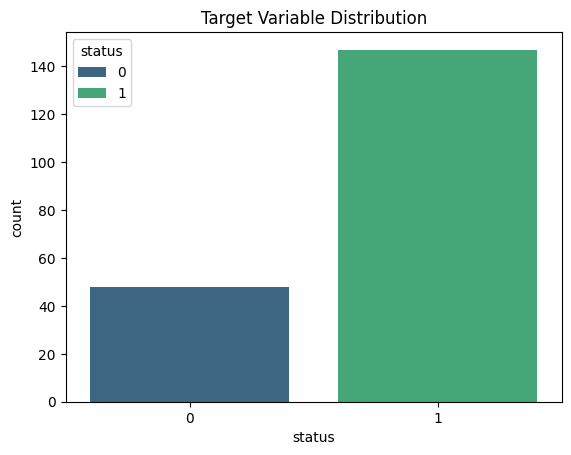

In [68]:
# Seaborn 라이브러리를 사용해서 'status' 컬럼의 값 개수를 막대그래프로 시각화
sns.countplot(
    x='status',         # x축에 표시할 컬럼명 (여기서는 파킨슨병 여부: 0 또는 1)
    data=data,          # 사용할 데이터프레임
    palette='viridis',  # 색상 테마 (이 경우 보라-초록 계열)
    hue='status'        # 막대를 'status' 값에 따라 색으로 구분
)

plt.title('Target Variable Distribution')
plt.show()

 데이터에서 중요한 속성들을 찾아내는 과정 (모델을 돌릴 때 쓸모 없는 변수들을 제거)

In [69]:
# 'name' 컬럼을 데이터프레임에서 제거
data.drop(
    'name',     # 삭제할 컬럼 이름
    axis=1,     # axis=1은 열(column)을 의미 (axis=0은 행(row))
    inplace=True  # True이면 원본 데이터(data)에 바로 적용됨 (복사본 안 만들고 직접 수정)
)

In [70]:
X = data.drop(columns=['status'])  # X는 입력 데이터 (features)만 저장 → 'status' 열(타겟)은 제외함
y = data['status']  # y는 타겟 데이터만 저장 → 여기서는 'status' (파킨슨병 여부)

In [71]:
# Remove Highly Correlated Features
# 1️⃣ 피처 간의 상관관계(correlation) 행렬 계산 (절댓값 기준)
# - corr(): 각 컬럼 간 피어슨 상관계수 계산
# - abs(): 부호와 상관없이 관련성의 강도만 보기 위해 절댓값 사용
correlation_matrix = X.corr().abs()

# 2️⃣ 상삼각행렬(Upper Triangle)만 선택
# - 상관계수 행렬은 대칭이므로 중복 제거를 위해 대각선 위쪽만 사용
# - np.triu(): 상삼각형 부분만 True인 마스크 생성 (k=1은 대각선 제외)
# - where(): 상삼각 부분 외에는 NaN으로 처리
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# 3️⃣ 상관계수가 0.9보다 큰 피처 탐색
# - 하나라도 0.9 초과의 상관관계를 가지는 경우 해당 컬럼을 제거 후보로 등록
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# 4️⃣ 상관관계가 높은 피처 제거
# - 중복 또는 유사한 정보 제거 → 모델 성능 향상 및 해석력 개선
X = X.drop(columns=to_drop)

# 5️⃣ 제거된 피처 출력
print(f"Dropped columns: {to_drop}")

Dropped columns: ['MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5', 'MDVPAPQ', 'ShimmerDDA', 'NHR', 'PPE']


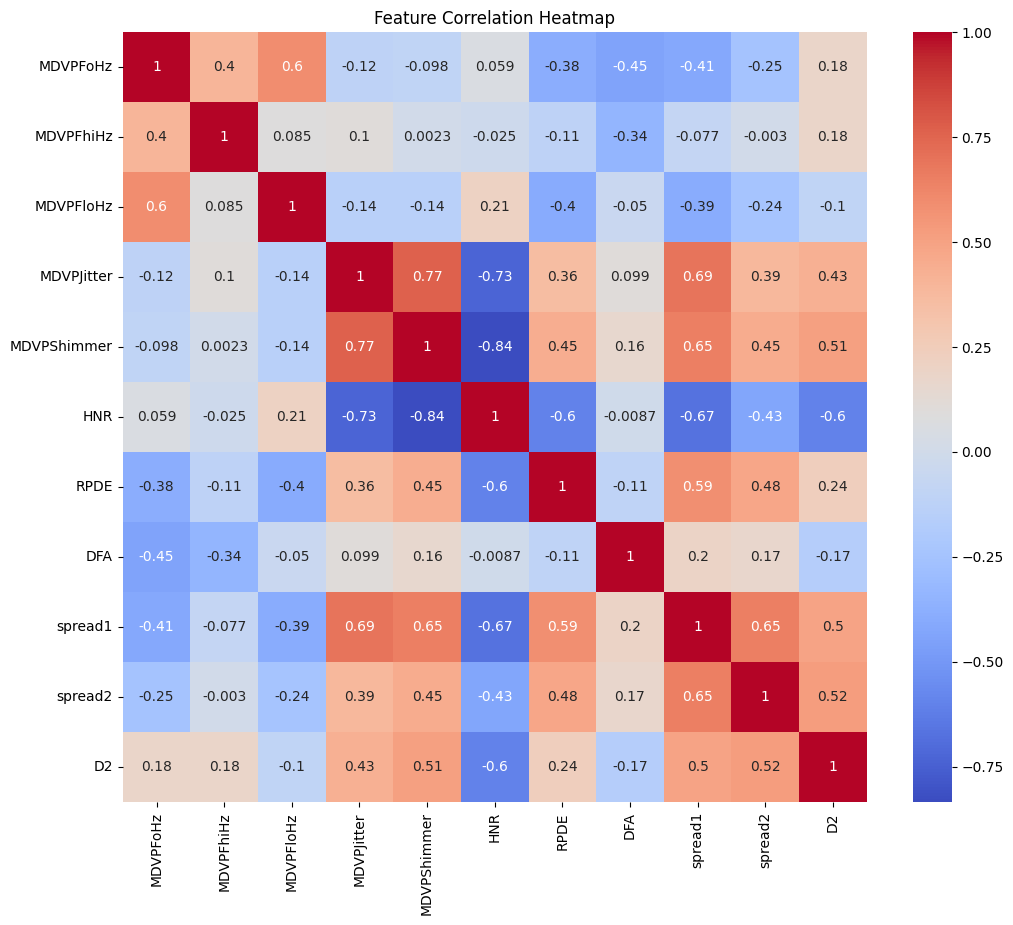

In [72]:
# Feature Correlation
# 🔍 피처 간 상관관계를 시각화하기 위한 히트맵 그리기
# - 상관계수 값이 클수록 색상이 진하게 표현됨
# - 유사한 피처를 직관적으로 파악할 수 있음

# 1️⃣ 그래프 크기 설정 (가로 12인치, 세로 10인치)
plt.figure(figsize=(12, 10))

# 2️⃣ heatmap 시각화
# - X.corr(): 피처 간 상관계수 계산
# - cmap='coolwarm': 파란색(음의 상관) ~ 빨간색(양의 상관) 컬러맵 사용
# - annot=True: 각 셀에 상관계수 숫자 표시
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)

# 3️⃣ 제목 추가
plt.title('Feature Correlation Heatmap')

# 4️⃣ 그래프 화면에 출력
plt.show()

훈련 데이터셋 나누기

In [73]:
# 🔀 전체 데이터를 학습용(train)과 테스트용(test)으로 분리
# → 모델이 학습한 데이터와 평가할 데이터를 구분하여 일반화 성능 확인

# - X: 입력 데이터 (특징 변수들)
# - y: 정답 데이터 (타겟 값, 예: 파킨슨 여부)

# - test_size=0.2: 전체 데이터의 20%를 테스트 세트로 사용 (80%는 학습용)
# - random_state=42: 랜덤 분할 시 동일한 결과가 나오도록 설정 (재현 가능성 확보)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 데이터의 값의 범위를 조정

In [74]:
# 필요한 라이브러리 불러오기: StandardScaler는 데이터를 표준화하는 데 사용됩니다.
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# X_train 데이터를 학습 데이터셋에 맞게 표준화 (평균을 0, 표준편차를 1로 만듬)
X_train = scaler.fit_transform(X_train)

# X_test 데이터를 학습 데이터셋에서 구한 평균과 표준편차로 표준화 (X_train에서 계산한 값 적용)
X_test = scaler.transform(X_test)

모델 훈련 및 평가

In [75]:
# Define Function for Model Training
# 여러 모델을 훈련하고 평가하는 함수 정의
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    # 성능 지표를 저장할 빈 리스트 초기화
    metrics = []
    
    # 모델 딕셔너리에서 각 모델에 대해 반복
    for name, model in models.items():
        # 모델을 훈련 데이터로 학습
        model.fit(X_train, y_train)
        
        # 테스트 데이터로 예측 수행
        y_pred = model.predict(X_test)
        
        # 평가 지표 계산: 정확도 (Accuracy)
        accuracy = accuracy_score(y_test, y_pred)
        
        # 평가 지표 계산: AUC-ROC (Receiver Operating Characteristic curve)
        auc_roc = roc_auc_score(y_test, y_pred)
        
        # 평가 지표 계산: 정밀도 (Precision)
        precision = precision_score(y_test, y_pred)
        
        # 평가 지표 계산: 재현율 (Recall)
        recall = recall_score(y_test, y_pred)
        
        # 평가 지표 계산: F1-Score
        f1 = f1_score(y_test, y_pred)
        
        # 계산된 지표들을 딕셔너리로 저장
        metrics.append({
            'Model': name,
            'Accuracy': accuracy,
            'AUC-ROC': auc_roc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
        
        # 각 모델의 평가 지표 출력
        print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {auc_roc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    
    # 평가 지표들을 DataFrame 형태로 반환
    return pd.DataFrame(metrics)

# 사용될 모델들 정의
models = {
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),  # XGBoost 모델
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),  # SVM 모델 (RBF 커널)
    'LogisticRegression': LogisticRegression(random_state=42),  # 로지스틱 회귀 모델
}

# 모델들을 훈련하고 평가 후, 성능 지표 DataFrame 반환
metrics_df = train_and_evaluate(models, X_train, X_test, y_train, y_test)


XGBoost - Accuracy: 0.9487, AUC-ROC: 0.8571, Precision: 0.9412, Recall: 1.0000, F1-Score: 0.9697
SVM (RBF Kernel) - Accuracy: 0.9231, AUC-ROC: 0.7857, Precision: 0.9143, Recall: 1.0000, F1-Score: 0.9552
LogisticRegression - Accuracy: 0.8974, AUC-ROC: 0.7143, Precision: 0.8889, Recall: 1.0000, F1-Score: 0.9412


In [76]:
metrics_df

,Model,Accuracy,AUC-ROC,Precision,Recall,F1-Score
0,XGBoost,0.948718,0.857143,0.941176,1.0,0.969697
1,SVM (RBF Kernel),0.923077,0.785714,0.914286,1.0,0.955224
2,LogisticRegression,0.897436,0.714286,0.888889,1.0,0.941176


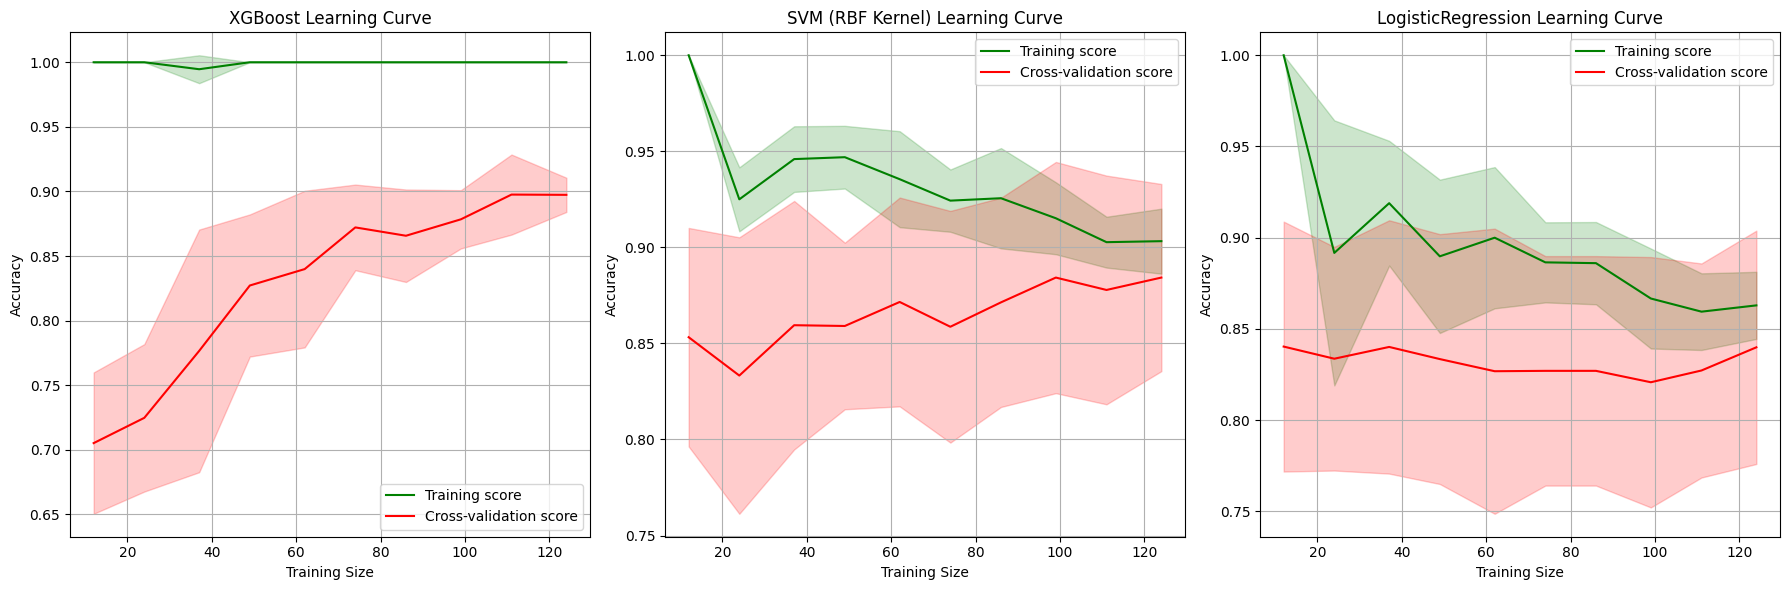

In [77]:
# 학습 곡선을 그리는 함수 정의
def plot_learning_curve(model, X_train, y_train, ax, title="Learning Curve", cv=5):
    # learning_curve 함수는 다양한 훈련 크기에서 훈련 점수와 교차 검증 점수를 계산합니다.
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, n_jobs=-1,  # 교차 검증의 폴드 수 (cv=5), 병렬 처리 (n_jobs=-1)
        train_sizes=np.linspace(0.1, 1.0, 10),  # 훈련 크기를 10단계로 나눔 (0.1에서 1.0까지)
        scoring='accuracy'  # 정확도(Accuracy)를 평가 지표로 사용
    )
    
    # 훈련 점수와 교차 검증 점수에 대한 평균과 표준편차 계산
    train_mean = np.mean(train_scores, axis=1)  # 훈련 데이터의 평균 점수
    train_std = np.std(train_scores, axis=1)    # 훈련 데이터의 표준편차
    test_mean = np.mean(test_scores, axis=1)    # 교차 검증 데이터의 평균 점수
    test_std = np.std(test_scores, axis=1)      # 교차 검증 데이터의 표준편차
    
    # 그래프에 훈련 점수와 교차 검증 점수를 그리기
    ax.plot(train_sizes, train_mean, label="Training score", color="green")  # 훈련 점수 선 그리기
    ax.plot(train_sizes, test_mean, label="Cross-validation score", color="red")  # 교차 검증 점수 선 그리기
    
    # 훈련 점수의 평균 ± 표준편차 영역을 그리기 (음영으로 표시)
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="green")
    # 교차 검증 점수의 평균 ± 표준편차 영역을 그리기 (음영으로 표시)
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")
    
    # 그래프의 제목 설정
    ax.set_title(title)
    # X축 라벨 설정
    ax.set_xlabel("Training Size")
    # Y축 라벨 설정
    ax.set_ylabel("Accuracy")
    # 범례 추가
    ax.legend(loc="best")
    # 그리드 추가
    ax.grid()

# 1행 3열의 서브플롯 생성 (모델별로 학습 곡선을 그릴 예정)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 각 모델에 대해 학습 곡선을 그리기
for i, (name, model) in enumerate(models.items()):
    # 각 모델에 대해 plot_learning_curve 함수 호출
    plot_learning_curve(model, X_train, y_train, axes[i], title=f"{name} Learning Curve")

# 서브플롯 간 간격을 최적화
plt.tight_layout() 
# 그래프 표시
plt.show()

앙상블 (다수결 방식 사용)

In [78]:
# VotingClassifier를 사용하여 여러 모델을 앙상블로 결합
ensemble_model = VotingClassifier(
    estimators=[  # 앙상블에 사용할 모델들을 리스트로 전달
        ('xgb', models['XGBoost']),  # XGBoost 모델
        ('svm', models['SVM (RBF Kernel)']),  # SVM 모델 (RBF 커널)
        ('lr', models['LogisticRegression'])  # 로지스틱 회귀 모델
    ], 
    voting='hard'  # 다수결 방식 (hard voting)으로 앙상블 결과를 결정
)

# 앙상블 모델 훈련
ensemble_model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측 수행
y_pred_ensemble = ensemble_model.predict(X_test)

# 앙상블 모델의 성능 지표 계산
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)  # 정확도
ensemble_auc_roc = roc_auc_score(y_test, y_pred_ensemble)  # AUC-ROC
ensemble_precision = precision_score(y_test, y_pred_ensemble)  # 정밀도
ensemble_recall = recall_score(y_test, y_pred_ensemble)  # 재현율
ensemble_f1 = f1_score(y_test, y_pred_ensemble)  # F1-Score

# 앙상블 모델의 성능 지표를 새로운 DataFrame으로 저장
new_metrics = pd.DataFrame([{
    'Model': 'Majority Voting (Ensemble)',  # 모델 이름
    'Accuracy': ensemble_accuracy,  # 정확도
    'AUC-ROC': ensemble_auc_roc,  # AUC-ROC
    'Precision': ensemble_precision,  # 정밀도
    'Recall': ensemble_recall,  # 재현율
    'F1-Score': ensemble_f1  # F1-Score
}])

# 기존의 모델 성능 지표와 앙상블 모델의 성능 지표를 합침
metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

# 앙상블 모델의 성능 지표를 출력
print(f"Ensemble - Accuracy: {ensemble_accuracy:.4f}, AUC-ROC: {ensemble_auc_roc:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, F1-Score: {ensemble_f1:.4f}")


Ensemble - Accuracy: 0.9231, AUC-ROC: 0.7857, Precision: 0.9143, Recall: 1.0000, F1-Score: 0.9552


In [79]:
metrics_df

,Model,Accuracy,AUC-ROC,Precision,Recall,F1-Score
0,XGBoost,0.948718,0.857143,0.941176,1.0,0.969697
1,SVM (RBF Kernel),0.923077,0.785714,0.914286,1.0,0.955224
2,LogisticRegression,0.897436,0.714286,0.888889,1.0,0.941176
3,Majority Voting (Ensemble),0.923077,0.785714,0.914286,1.0,0.955224


결과 비교

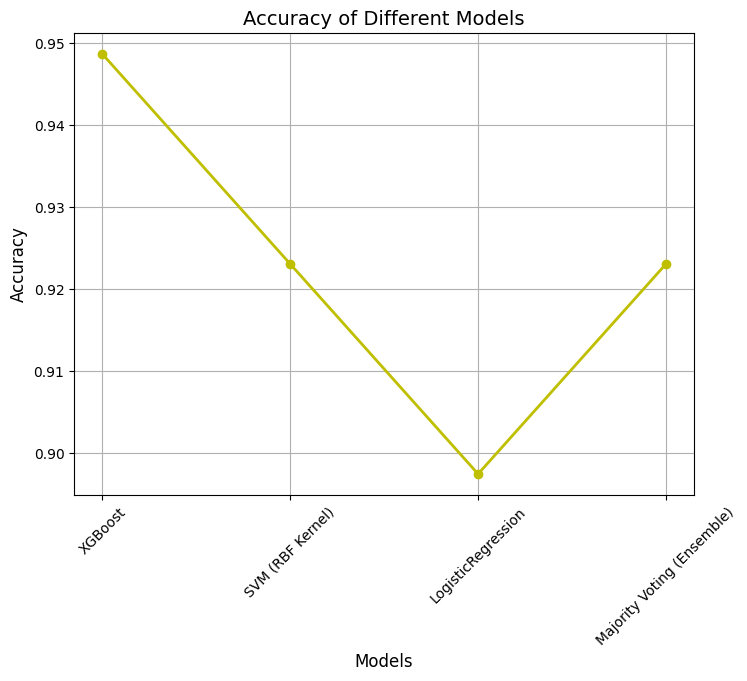

In [80]:
# Accuracy 열을 선 그래프로 시각화하기 위한 코드
plt.figure(figsize=(8, 6))  # 그래프의 크기를 (8, 6)으로 설정

# 'Model'에 대한 Accuracy 값을 선 그래프로 그림
plt.plot(metrics_df['Model'], metrics_df['Accuracy'], marker='o', color='y', linestyle='-', linewidth=2)
# - 'metrics_df['Model']': 모델 이름이 포함된 x축 값
# - 'metrics_df['Accuracy']': 각 모델의 정확도 값이 포함된 y축 값
# - 'marker='o'': 데이터 포인트를 원 모양으로 표시
# - 'color='y'': 선의 색깔을 노란색('y')로 설정
# - 'linestyle='-'': 선 스타일을 실선으로 설정
# - 'linewidth=2': 선의 두께를 2로 설정

# 그래프의 제목 설정
plt.title('Accuracy of Different Models', fontsize=14)  # 제목을 'Accuracy of Different Models'로 설정하고 폰트 크기 14로 지정

# x축과 y축의 라벨을 설정
plt.xlabel('Models', fontsize=12)  # x축 라벨을 'Models'로 설정하고 폰트 크기 12로 지정
plt.ylabel('Accuracy', fontsize=12)  # y축 라벨을 'Accuracy'로 설정하고 폰트 크기 12로 지정

# x축 레이블을 45도 회전시켜서 가독성을 높임
plt.xticks(rotation=45)

# 그리드 표시
plt.grid(True)  # 그래프에 그리드 추가

# 그래프를 화면에 출력
plt.show()

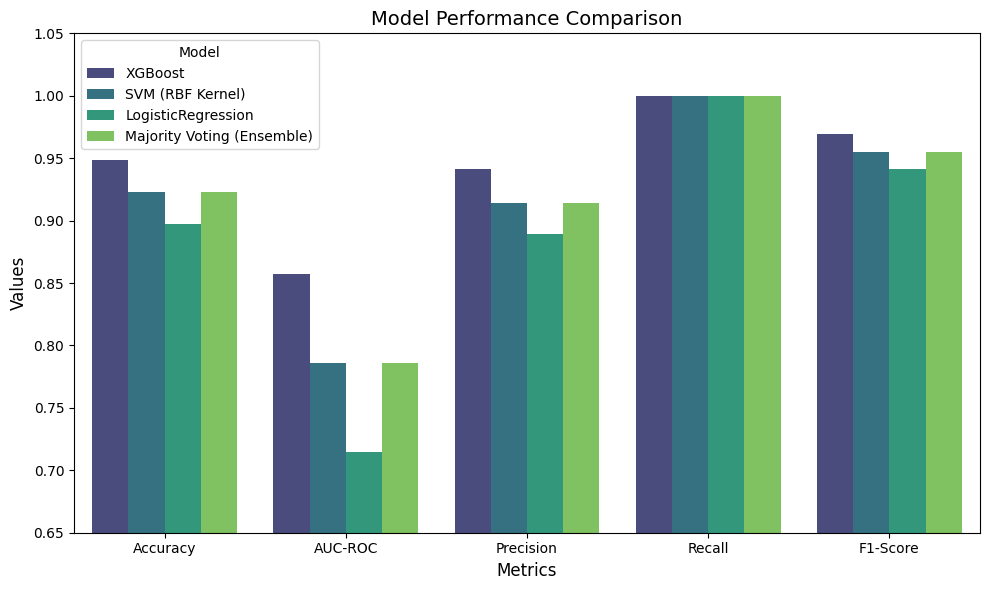

In [55]:
# 시각화할 성능 지표 목록 설정
metrics_to_plot = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score']

# metrics_df를 긴 형태로 변환 (melt)하여 각 모델의 성능 지표를 하나의 열에 배치
melted_df = metrics_df.melt(
    id_vars=["Model"],  # 'Model' 컬럼은 그대로 두고,
    value_vars=metrics_to_plot,  # 성능 지표들 (Accuracy, AUC-ROC, Precision, Recall, F1-Score)
    var_name="Metric",  # 새로운 열 이름을 'Metric'으로 설정 (지표 이름)
    value_name="Value"  # 새로운 열 이름을 'Value'로 설정 (지표 값)
)

# 모든 모델에 대한 바 그래프를 그리기 위한 코드
plt.figure(figsize=(10, 6))  # 그래프 크기를 10x6으로 설정

# seaborn의 barplot을 사용하여 막대 그래프 생성
sns.barplot(
    x="Metric",  # x축은 'Metric' (지표 이름)
    y="Value",  # y축은 'Value' (각 지표의 값)
    hue="Model",  # hue는 'Model'로 설정하여 모델별로 다른 색상
    data=melted_df,  # 데이터를 melted_df로 설정
    palette="viridis",  # 색상 팔레트는 'viridis'로 설정
    dodge=True  # 각 모델에 대해 다른 막대를 표시 (모델별 구분)
)

# 그래프의 제목, x축, y축 레이블 설정
plt.title("Model Performance Comparison", fontsize=14)  # 제목 설정
plt.xlabel("Metrics", fontsize=12)  # x축 라벨 설정
plt.ylabel("Values", fontsize=12)  # y축 라벨 설정

# x축과 y축의 레이블 폰트 크기 설정
plt.xticks(fontsize=10)  # x축 레이블 폰트 크기
plt.yticks(fontsize=10)  # y축 레이블 폰트 크기

# 범례에 제목을 추가하고, 범례 폰트 크기 설정
plt.legend(title="Model", fontsize=10)

# y축 값의 최소값을 0.65로 설정하여 그래프의 시작점을 0.65로 맞추고,
# 아래로의 공간을 확보 (주로 모델 성능이 이 범위 내에 있을 때 유용)
plt.ylim(0.65, None)

# 그래프 레이아웃을 자동으로 최적화
plt.tight_layout()

# 그래프를 화면에 표시
plt.show()


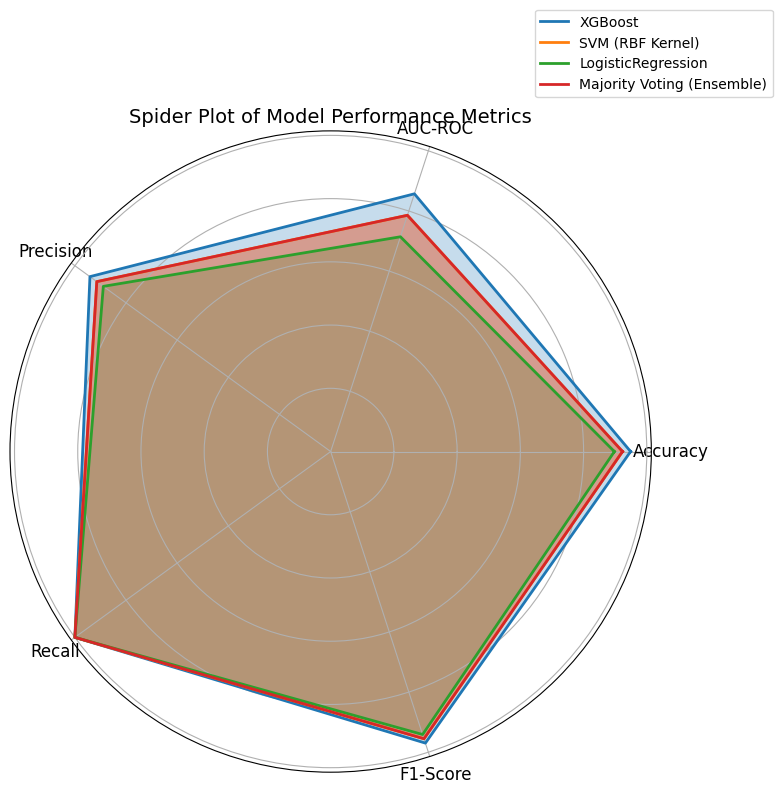

In [81]:
# 모든 모델을 함께 시각화하는 레이더 차트를 그리는 함수 정의
def plot_spider_chart(df):
    labels = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score']  # 레이더 차트에 사용할 지표 목록 설정
    num_vars = len(labels)  # 지표의 개수 (여기서는 5개)

    # 각 축에 대한 각도 계산 (레이더 차트의 각 축은 원형으로 배치)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # 0부터 2π까지 균등하게 각도를 나눔
    angles += angles[:1]  # 첫 번째 각도를 끝에 추가하여 원을 닫음

    # 모든 모델에 대한 차트를 그리기 위한 새로운 서브플롯 생성
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))  # polar=True로 설정하여 레이더 차트를 그리기 위한 설정

    # 각 모델에 대해 성능 지표를 추출하고 그리기
    for model_name in df['Model'].unique():  # 모든 모델 이름에 대해 반복
        model_metrics = df[df['Model'] == model_name].iloc[0, 1:].values  # 모델별 지표 값 추출 (첫 번째 행만 선택)
        model_metrics = np.concatenate((model_metrics, [model_metrics[0]]))  # 첫 번째 지표 값을 마지막에 추가하여 원을 닫음
        ax.plot(angles, model_metrics, linewidth=2, linestyle='solid', label=model_name)  # 성능 지표를 레이더 차트에 그리기
        ax.fill(angles, model_metrics, alpha=0.25)  # 모델의 영역을 채워서 시각적으로 강조 (투명도 0.25)

    ax.set_yticklabels([])  # y축 레이블을 숨김 (레이더 차트에서는 일반적으로 사용되지 않음)
    ax.set_xticks(angles[:-1])  # x축의 각도에 해당하는 위치를 설정
    ax.set_xticklabels(labels, fontsize=12)  # x축에 지표 이름을 추가하고 폰트 크기 설정
    ax.set_title("Spider Plot of Model Performance Metrics", size=14)  # 차트의 제목을 설정하고 크기 지정
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))  # 범례 위치 설정 (차트 오른쪽 위에 배치)
    plt.tight_layout()  # 그래프가 잘리거나 겹치지 않도록 레이아웃 조정
    plt.show()  # 차트를 화면에 출력

# 'metrics_df' 데이터를 사용하여 레이더 차트 시각화
plot_spider_chart(metrics_df)

결론
**SVM (RBF 커널)과 Majority Voting(앙상블) 모델도 우수한 성능을 보였습니다.**
    
    이 두 모델은 정확도(92.31%)와 F1-점수(95.52%) 면에서 XGBoost보다 약간 낮지만, 여전히 높은 성능을 유지했습니다.
    
**Logistic Regression은 가장 낮은 성능을 보였습니다.**
    
    정확도는 89.74%, F1-점수는 94.12%로 다른 모델보다 낮았습니다.
    
**모든 모델이 재현율(Recall) 1.0을 기록했습니다.**
    
    이는 양성 사례(Positive Class)를 빠뜨리지 않고 모두 잘 탐지했다는 것을 의미합니다.
    
**종합적으로 볼 때, XGBoost가 가장 우수한 모델입니다.**
    **XGBoost는 모든 모델 중에서 가장 뛰어난 성능을 보였습니다.**
        
        정확도(94.87%)와 F1-점수(96.97%)가 가장 높았습니다.
        
    
    하지만 SVM과 Majority Voting 앙상블 모델도 신뢰할 수 있는 대안으로 평가됩니다.

**XGBoost가 1등**,

**SVM(이진 분류를 위한 기법)과 앙상블(다수결)도 우수**,

**Logistic(로지스틱 회귀)은 비교적 낮음**,

**하지만 모든 모델이 양성 케이스는 완벽하게 탐지했다**는 결론